Autor: Gabriel Bhering

Imports, como sempre

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Nome do arquivo, isolado pra ser fácil de enxergar e alterar

In [2]:
fname='datasets/pokemon.csv'

Agora utilizando a função default de pandas para ler csv e construir um dataframe, seguido de algumas funções de teste para mostrar como o dataframe ficou e como acessa-lo elegantemente

In [3]:
df=pd.read_csv(fname)

In [4]:
print(df.columns.values)

['abilities' 'against_bug' 'against_dark' 'against_dragon'
 'against_electric' 'against_fairy' 'against_fight' 'against_fire'
 'against_flying' 'against_ghost' 'against_grass' 'against_ground'
 'against_ice' 'against_normal' 'against_poison' 'against_psychic'
 'against_rock' 'against_steel' 'against_water' 'attack' 'base_egg_steps'
 'base_happiness' 'base_total' 'capture_rate' 'classfication' 'defense'
 'experience_growth' 'height_m' 'hp' 'japanese_name' 'name'
 'percentage_male' 'pokedex_number' 'sp_attack' 'sp_defense' 'speed'
 'type1' 'type2' 'weight_kg' 'generation' 'is_legendary']


In [5]:
print(df[['name','weight_kg']][0:10])

         name  weight_kg
0   Bulbasaur        6.9
1     Ivysaur       13.0
2    Venusaur      100.0
3  Charmander        8.5
4  Charmeleon       19.0
5   Charizard       90.5
6    Squirtle        9.0
7   Wartortle       22.5
8   Blastoise       85.5
9    Caterpie        2.9


In [6]:
print(df.weight_kg[0:20])

0       6.9
1      13.0
2     100.0
3       8.5
4      19.0
5      90.5
6       9.0
7      22.5
8      85.5
9       2.9
10      9.9
11     32.0
12      3.2
13     10.0
14     29.5
15      1.8
16     30.0
17     39.5
18      NaN
19      NaN
Name: weight_kg, dtype: float64


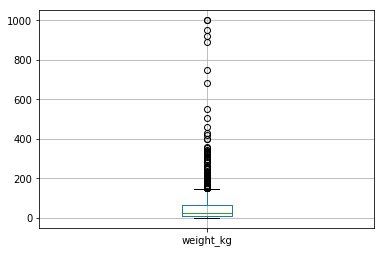

In [7]:
bp=df.boxplot(column=['weight_kg'])
plt.show()

Agora, para os exercícios de fato! Já que já carregamos os csv, o próximo seria plotar os pesos 

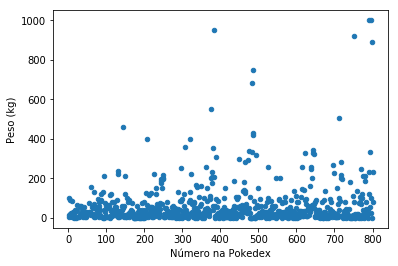

In [8]:
sp1=df.plot.scatter(x='pokedex_number',y='weight_kg')
sp1.set_xlabel('Número na Pokedex')
sp1.set_ylabel('Peso (kg)')
plt.show()

Calcular a média e desvio padrão com pandas é bem trivial. Ambos os métodos tem o parametro `skipna` que por default é `True` fazendo com que os valores vazios no csv, interpretados como `NaN` no dataframe não contem no cálculo.

In [9]:
avg=df.weight_kg.mean()
sd=df.weight_kg.std()
print("Média do peso dos pokemons:",avg,"kg com desvio padrão de ",sd,"kg")

Média do peso dos pokemons: 61.37810499359791 kg com desvio padrão de  109.35476585346375 kg


Como bonus, aqui o scatter plot com menos outliers

In [10]:
nsd=1.2
lb=avg-sd*nsd
hb=avg+sd*nsd

query explicita: weight_kg > -69.84761403055859 and weight_kg < 192.6038240177544


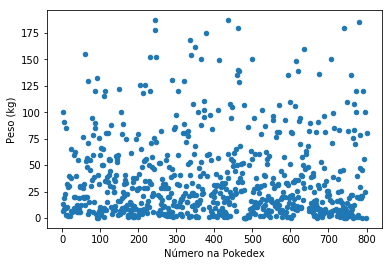

In [11]:
q='weight_kg > {lower_bound} and weight_kg < {higher_bound}'.format(lower_bound=lb,higher_bound=hb)
print('query explicita:', q)
sp2=df.query(q).plot.scatter(x='pokedex_number',y='weight_kg')
sp2.set_xlabel('Número na Pokedex')
sp2.set_ylabel('Peso (kg)')
plt.show()

Por fim, o histograma com amostras aleatórias, que também é bem trivial

In [12]:
sample_size=80
samples=[df.weight_kg.sample(sample_size).mean() for i in range(1000)]

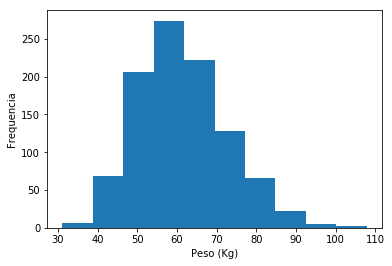

In [13]:
hst=plt.hist(samples)
plt.xlabel("Peso (Kg)")
plt.ylabel("Frequencia")
plt.show()